# Data field description

*   customerID - a unique ID for each customer
*   gender - Whether the customer is male or female
*   SeniorCitizen - Whether the cutsomer is senior citizen or not
*   Partner - Whether the customer has a partner or not
*   Dependents - Whether the customer has dependents or not
*   tenure - Number of months the customer has stayed with the company
*   PhoneService - Whether the customer has a phone service or not
*   MultipleLines - Whether the customer has multiple lines or not
*   InternetService - Customer’s internet service provider
*   OnlineSecurity - Whether the customer has online security or not
*   TechSupport - Whether the customer has tech support or not
*   StreamingTV - Whether the customer has streaming TV or not
*   StreamingMovies - Whether the customer has streaming movies or not
*   Contract - The contract term of the customer (Month-to-month, One year, Two year)
*   PaperlessBiling - Whether the customer has paperless billing or not
*   PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)
*   MonthlyCharges - The amount charged to the customer monthly
*   TotalCharges - The total amount charged to the customer
*   DeviceProtection - Whether the customer has device protection or not
*   Churn - Whether the customer churned or not

# Importing Python Packages and Datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
churn_data = pd.read_csv('/churn_data.csv')
customer_data = pd.read_csv('/customer_data.csv')
internet_data = pd.read_csv('/internet_data.csv')

# Exploratory Data Analysis (EDA)

In [ ]:
# merge three dataset
df = churn_data.merge(internet_data, on='customerID')
df = df.merge(customer_data, on='customerID')

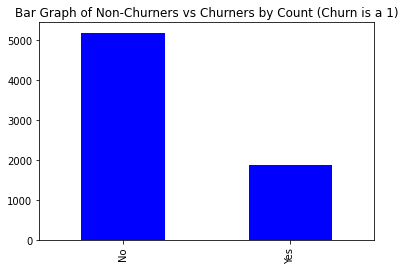

In [ ]:
# This creates a bar graph of churn (Yes vs. No) so we can check how the data is balanced.
df['Churn'].value_counts().plot(kind = 'bar', title = 'Bar Graph of Non-Churners vs Churners by Count (Churn is a 1)', color = 'blue', align = 'center')
plt.show()

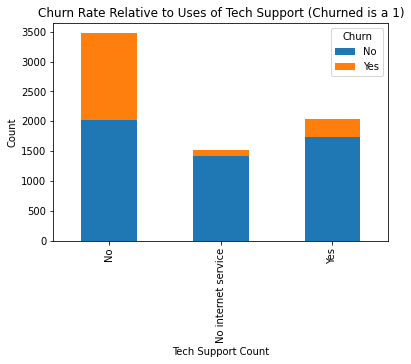

In [ ]:
# Explore the relationship between instances of Tech Support and Churn. 
# Stacked Bar of Tech Support and Churn.
tech_support_churn = pd.crosstab(df['TechSupport'], df['Churn'])
tech_support_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('Tech Support Count')
plt.title('Churn Rate Relative to Uses of Tech Support (Churned is a 1)')
plt.show()

In [ ]:
df.drop('customerID',axis=1,inplace=True)

In [ ]:
#Creating list of multivalues and boolean columns
multi_cols = ['InternetService','PaymentMethod', 'Contract']

In [ ]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[multi_cols], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

#Dropping the multivalues columns from the categorical dataframe
df.drop(multi_cols,axis=1,inplace=True)

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [ ]:
# convert from yes no data to int variable
def convert_noservice(data):
  data[['TechSupport','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
       'StreamingTV', 'StreamingMovies']] = data[['TechSupport','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
       'StreamingTV', 'StreamingMovies']].replace("No internet service", 0)
  data[['MultipleLines']] = data[['MultipleLines']].replace("No phone service", 0)
  
  return data

In [ ]:
df = convert_noservice(df)

In [ ]:
# convert from yes no data to int variable
def convert_YN(data):
  data[['TechSupport','gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
         'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']] = data[['TechSupport','gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
         'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']].replace("Yes", 1)
  data[['TechSupport','gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
         'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']] = data[['TechSupport','gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
         'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']].replace("No", 0)
  
  return data

In [ ]:
df = convert_YN(df)

In [ ]:
df['gender'] = df['gender'].replace("Female",1)
df['gender'] = df['gender'].replace("Male",0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   PhoneService                           7043 non-null   int64  
 2   PaperlessBilling                       7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   Churn                                  7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

In [ ]:
#Dropping the records with missing values
df.dropna(inplace = True)
df.isnull().sum().any()

False

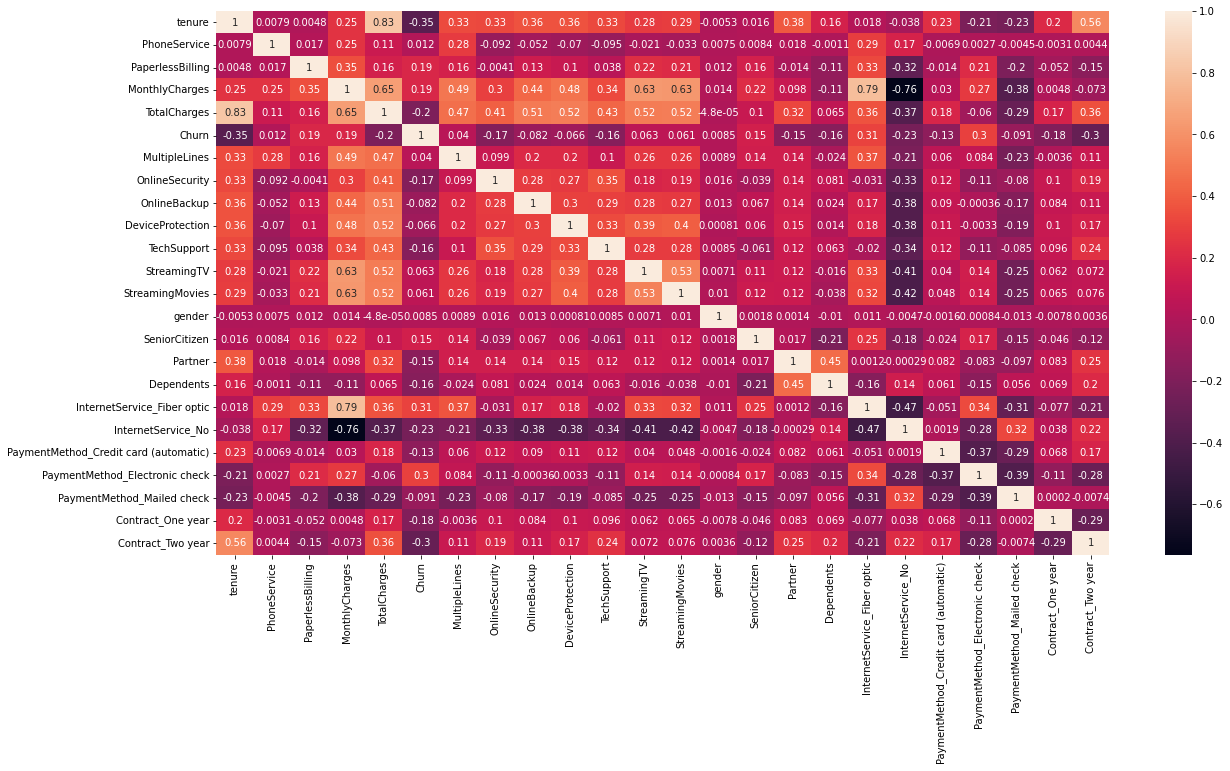

In [ ]:
# heatmap for features correlation
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [ ]:
# correlation for churn with each others features
corr_matrix = df.corr()['Churn'].sort_values(ascending=False)[1:]
px.defaults.template = "plotly_white"
fig = px.bar(corr_matrix,height=600,color_discrete_sequence=['#288ba8'])
fig.update_xaxes(tickangle=50)
fig.show()

In [ ]:
df.to_csv("churn_dataset.csv")